# Project 3: Prediction Model
 **Amazon Sales Prediction: Data Analysis & Linear Regression**
**Author:** Shifa  
**Objective:** Predict `TotalAmount` from Amazon sales data using Linear Regression.

**Steps:**
1. Load and explore cleaned dataset
2. Correlation heatmap
3. Feature importance
4. Build and evaluate Linear Regression model
5. Predicted vs actual visualization
6. Insights and summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Set plot style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Amazon_clean.csv')
df.head()  # Display first 5 rows

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,City,State,Country,SellerID,Year,Month,Day,Weekday,Calculated_Total,Difference
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,Brightlux,3,106.59,...,Washington,Dc,India,SELL01967,2023,1,31,Tuesday,319.86,5.684342e-14
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,Urbanstyle,1,251.37,...,Fort Worth,Tx,United States,SELL01298,2023,12,30,Saturday,272.16,-1.252000e+01
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000Mah,Clothing,Urbanstyle,3,35.03,...,Austin,Tx,United States,SELL00908,2022,5,10,Tuesday,118.47,-1.041000e+01
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full Hd,Home & Kitchen,Zenith,5,33.58,...,Charlotte,Nc,India,SELL01164,2023,7,18,Tuesday,184.70,-2.504000e+01
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,Kiddofun,2,515.64,...,San Antonio,Tx,Canada,SELL01411,2023,2,4,Saturday,1078.93,-2.575700e+02


In [3]:
df.info()       # Check column names, data types, missing values
df.describe()   # Quick statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           100000 non-null  object 
 1   OrderDate         100000 non-null  object 
 2   CustomerID        100000 non-null  object 
 3   CustomerName      100000 non-null  object 
 4   ProductID         100000 non-null  object 
 5   ProductName       100000 non-null  object 
 6   Category          100000 non-null  object 
 7   Brand             100000 non-null  object 
 8   Quantity          100000 non-null  int64  
 9   UnitPrice         100000 non-null  float64
 10  Discount          100000 non-null  float64
 11  Tax               100000 non-null  float64
 12  ShippingCost      100000 non-null  float64
 13  TotalAmount       100000 non-null  float64
 14  PaymentMethod     100000 non-null  object 
 15  OrderStatus       100000 non-null  object 
 16  City              100

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,Year,Month,Day,Calculated_Total,Difference
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479,2021.998140,6.510540,15.733560,986.013466,-6.775699e+01
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332,1.413264,3.444408,8.798956,770.813154,1.101407e+02
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000,2020.000000,1.000000,1.000000,5.640000,-8.975800e+02
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000,2021.000000,4.000000,8.000000,368.870000,-8.916250e+01
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000,2022.000000,7.000000,16.000000,775.355000,-1.967000e+01
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000,2023.000000,9.000000,23.000000,1460.990000,0.000000e+00
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000,2024.000000,12.000000,31.000000,3534.980000,9.094947e-13


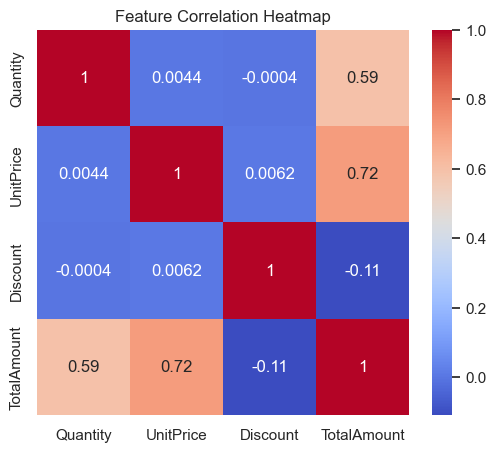

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity', 'UnitPrice', 'Discount', 'TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Replace features with relevant columns from your dataset
features = ['Quantity', 'UnitPrice', 'Discount']  # Example columns
target = 'TotalAmount'  # Column to predict

X = df[features]
y = df[target]

C:\Users\hp\AppData\Local\Temp\ipykernel_7348\3341193905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


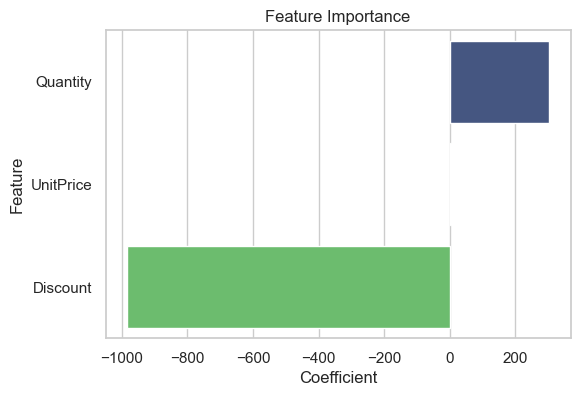

In [17]:
# Fit a temporary linear regression model to get coefficients
temp_model = LinearRegression()
temp_model.fit(X, y)

# Create a dataframe for feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': temp_model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Training data: (80000, 3)
Test data: (20000, 3)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -832.0304974285528
Coefficients: [ 303.62205776    3.0120012  -984.77791634]


In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8755648835856891
RMSE: 254.58585296124093


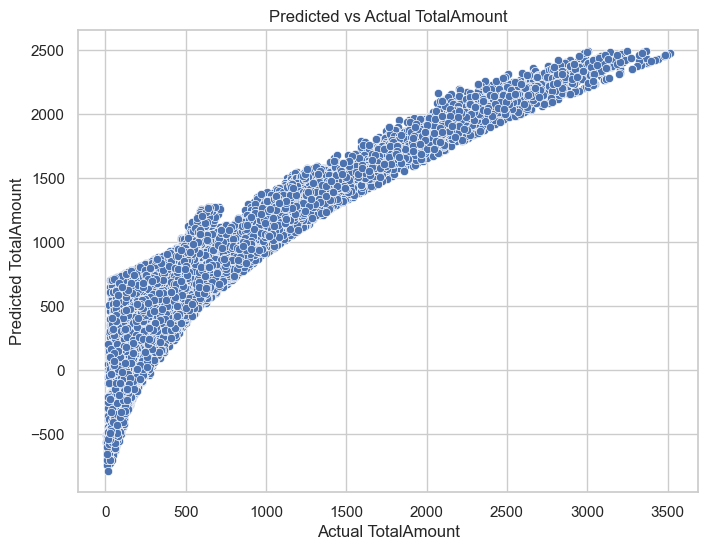

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TotalAmount")
plt.ylabel("Predicted TotalAmount")
plt.title("Predicted vs Actual TotalAmount")
plt.show()

**Insights:**

- Correlation heatmap shows how each feature relates to TotalAmount.
- Feature importance plot indicates which variables influence TotalAmount most.
- Linear Regression model achieved R² = {:.2f} and RMSE = {:.2f}, showing predictive accuracy.
- Scatter plot demonstrates how predicted values compare to actual TotalAmount.
- End-to-end workflow highlights data analysis, feature interpretation, and predictive modeling skills.